**Grader - Please note the starter notebook for this activity has been changed by the instructor for this class. 

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
#dependencies 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

# random forest classifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("exoplanet_data.csv")
df.head(40)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


# Read the CSV and Perform Basic Data Cleaning

In [4]:
# Exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [5]:
print(df.columns)

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [6]:
# Inspect rows and columns with missing data and decide what to do with them

# Drop rows/columns with missing data or you can replace missing data


# Select your features (columns)

In [7]:
# Set your y to be koi-disposition and your X to be all other columns

# set X columns features
# exclude 'koi_disposition',for use as y axis
select_features = df[
    
    [ 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']
    
]
select_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [8]:
# Set your y to be koi-disposition 
y = df["koi_disposition"]
X = select_features

In [9]:
# Drop *unimportant, irrelevant, or duplicate columns
####### no duplicate  columns identified  #####

# Create a Train Test Split


In [10]:
# split and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,2.213000e-04,-2.213000e-04,132.035800,0.014300,-0.014300,...,-286,3.805,0.390,-0.130,2.730,0.535,-1.248,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,1.528000e-04,-1.528000e-04,131.968430,0.008230,-0.008230,...,-72,4.083,0.368,-0.092,1.453,0.218,-0.510,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,6.930000e-07,-6.930000e-07,137.137607,0.000053,-0.000053,...,-159,4.462,0.098,-0.182,0.897,0.238,-0.119,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,1.194000e-02,-1.194000e-02,136.373100,0.019000,-0.019000,...,-146,4.456,0.102,-0.361,0.867,0.448,-0.103,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,1.250000e-06,-1.250000e-06,133.850441,0.000978,-0.000978,...,-167,3.975,0.259,-0.111,1.851,0.383,-0.575,288.90253,44.632992,12.953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,0,0,0,0,25.159339,4.236000e-04,-4.236000e-04,153.040400,0.011300,-0.011300,...,-229,4.506,0.050,-0.200,0.935,0.280,-0.093,294.48730,42.006920,15.759
2249,0,0,0,0,2.104722,8.860000e-07,-8.860000e-07,171.044219,0.000334,-0.000334,...,-188,4.498,0.036,-0.204,0.975,0.264,-0.088,293.05722,45.551189,14.427
3751,0,1,0,1,43.798566,3.470000e-04,-3.470000e-04,172.585050,0.007470,-0.007470,...,-152,3.842,0.344,-0.108,2.227,0.371,-0.803,295.82376,44.795910,12.963
6016,0,0,0,0,91.069934,7.107000e-03,-7.107000e-03,196.391000,0.102000,-0.102000,...,-379,3.623,0.305,-0.305,4.232,0.909,-1.521,295.51334,42.318790,9.748


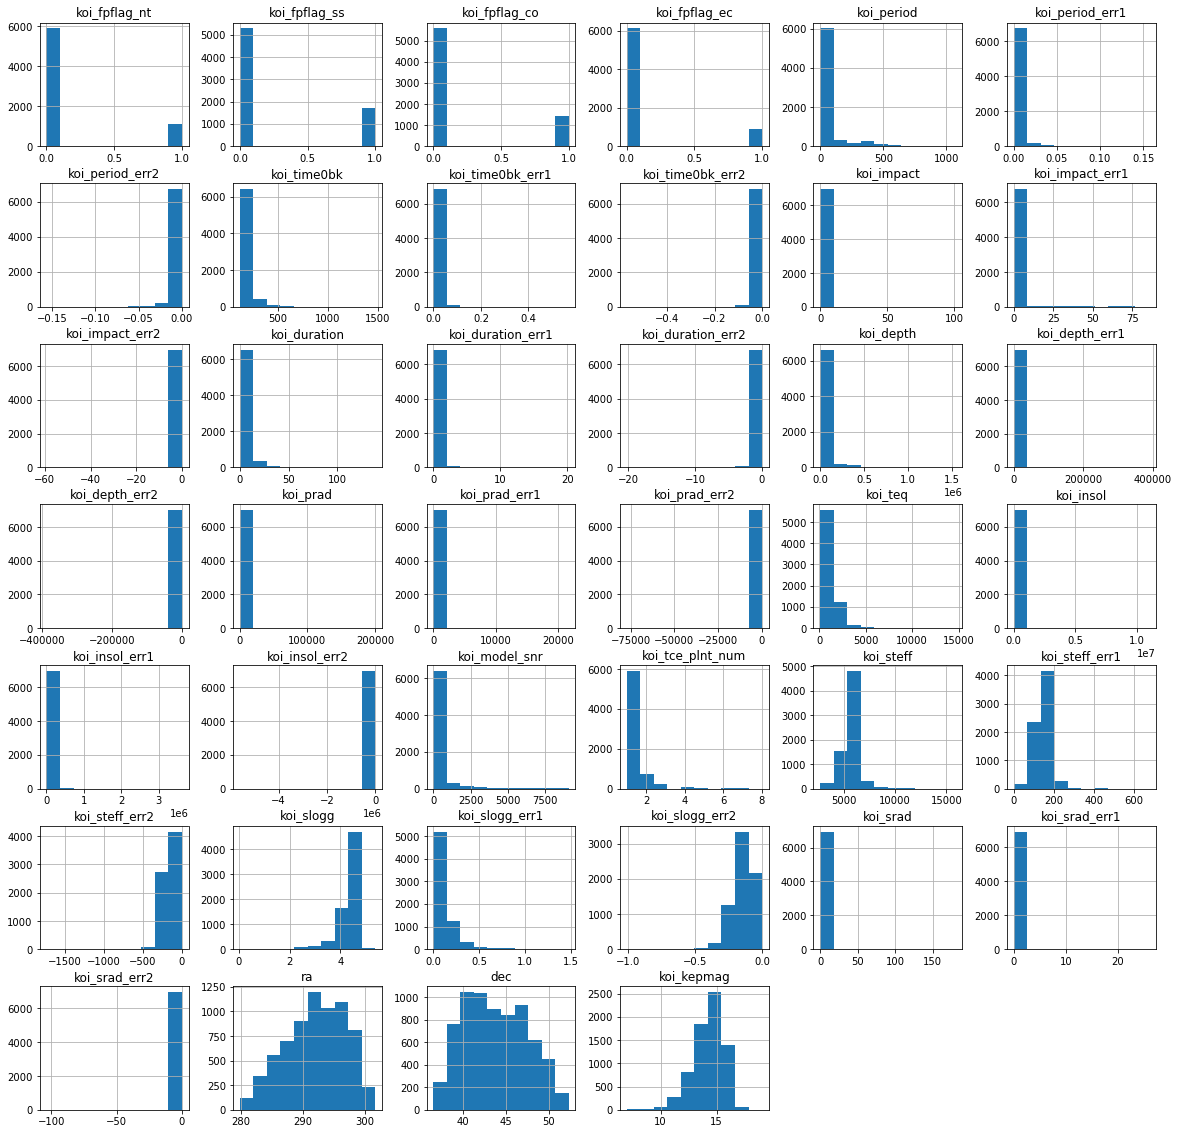

In [11]:
# plot histograms of each parameter
df.hist(figsize = (20,20))
plt.show()

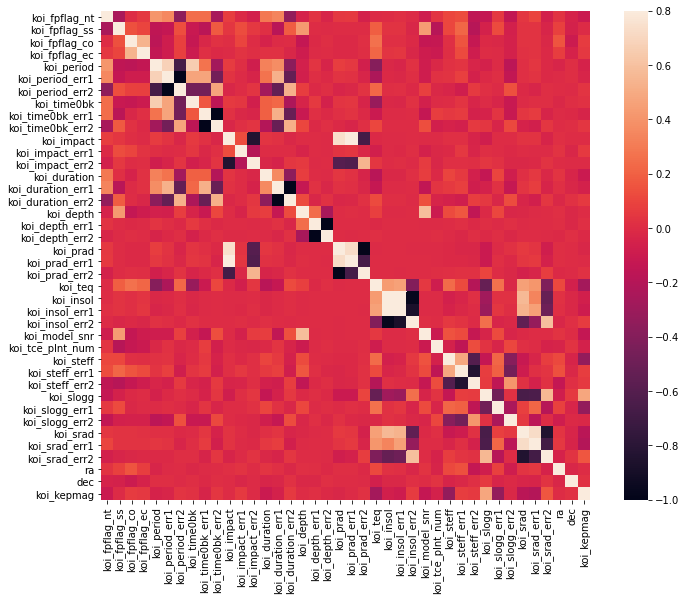

In [12]:
#  correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=.8,square = True)
plt.show()

# Pre-processing

In [13]:
# Scale your data using appropriate scaler
# scale train and test data
#X_scaler = StandardScaler().fit (X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)
#label_encoder = LabelEncoder()
#label_encoder.fit(y_train)
#encoded_y_train = label_encoder.transform(y_train)
#encoded_y_test = label_encoder.transform(y_test)

###### Try MinMaxScaler 
X_scaler = MinMaxScaler().fit (X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Train various  models



## Model 1

# Instantiate model 1 (e.g., logistic model)


In [14]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)

['CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE' ... 'FALSE POSITIVE'
 'FALSE POSITIVE' 'CONFIRMED']


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.85714
Testing Data Score: 0.86041


In [16]:
# Print clasification report by importing classification_report from sklearn.m
print(classification_report(y_test,predictions, target_names =['CANDIDATE','CONFIRMED','FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.77      0.64      0.70       422
     CONFIRMED       0.71      0.80      0.75       450
FALSE POSITIVE       0.99      1.00      0.99       876

      accuracy                           0.86      1748
     macro avg       0.82      0.81      0.81      1748
  weighted avg       0.86      0.86      0.86      1748



# Fit model using GridSearchCV if it makes sense

In [17]:
# Create the SVC Model train and test it
model = SVC(kernel= 'linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [18]:
param_grid = {'C': [1, 5, 10, 50],
              'max_iter': [50,100,200]}
grid = GridSearchCV(model, param_grid, verbose=3)
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, max_iter=50 ................................................
[CV] .................... C=1, max_iter=50, score=0.753, total=   0.1s
[CV] C=1, max_iter=50 ................................................
[CV] .................... C=1, max_iter=50, score=0.753, total=   0.1s
[CV] C=1, max_iter=50 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxSc

[CV] .................... C=1, max_iter=50, score=0.761, total=   0.1s
[CV] C=1, max_iter=50 ................................................
[CV] .................... C=1, max_iter=50, score=0.747, total=   0.1s
[CV] C=1, max_iter=50 ................................................
[CV] .................... C=1, max_iter=50, score=0.798, total=   0.1s


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] C=1, max_iter=100 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1, max_iter=100, score=0.753, total=   0.2s
[CV] C=1, max_iter=100 ...............................................
[CV] ................... C=1, max_iter=100, score=0.753, total=   0.1s
[CV] C=1, max_iter=100 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1, max_iter=100, score=0.774, total=   0.2s
[CV] C=1, max_iter=100 ...............................................
[CV] ................... C=1, max_iter=100, score=0.747, total=   0.2s
[CV] C=1, max_iter=100 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1, max_iter=100, score=0.811, total=   0.2s
[CV] C=1, max_iter=200 ...............................................
[CV] ................... C=1, max_iter=200, score=0.753, total=   0.1s
[CV] C=1, max_iter=200 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1, max_iter=200, score=0.755, total=   0.2s
[CV] C=1, max_iter=200 ...............................................
[CV] ................... C=1, max_iter=200, score=0.775, total=   0.1s
[CV] C=1, max_iter=200 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1, max_iter=200, score=0.748, total=   0.1s
[CV] C=1, max_iter=200 ...............................................
[CV] ................... C=1, max_iter=200, score=0.785, total=   0.1s
[CV] C=5, max_iter=50 ................................................
[CV] .................... C=5, max_iter=50, score=0.765, total=   0.0s
[CV] C=5, max_iter=50 ................................................
[CV] .................... C=5, max_iter=50, score=0.764, total=   0.0s
[CV] C=5, max_iter=50 ................................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=5, max_iter=50, score=0.767, total=   0.1s
[CV] C=5, max_iter=50 ................................................
[CV] .................... C=5, max_iter=50, score=0.752, total=   0.1s
[CV] C=5, max_iter=50 ................................................
[CV] .................... C=5, max_iter=50, score=0.773, total=   0.1s
[CV] C=5, max_iter=100 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, max_iter=100, score=0.758, total=   0.1s
[CV] C=5, max_iter=100 ...............................................
[CV] ................... C=5, max_iter=100, score=0.764, total=   0.1s
[CV] C=5, max_iter=100 ...............................................
[CV] ................... C=5, max_iter=100, score=0.764, total=   0.1s
[CV] C=5, max_iter=100 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, max_iter=100, score=0.751, total=   0.1s
[CV] C=5, max_iter=100 ...............................................
[CV] ................... C=5, max_iter=100, score=0.758, total=   0.1s
[CV] C=5, max_iter=200 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, max_iter=200, score=0.765, total=   0.2s
[CV] C=5, max_iter=200 ...............................................
[CV] ................... C=5, max_iter=200, score=0.771, total=   0.1s
[CV] C=5, max_iter=200 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, max_iter=200, score=0.765, total=   0.2s
[CV] C=5, max_iter=200 ...............................................
[CV] ................... C=5, max_iter=200, score=0.759, total=   0.1s
[CV] C=5, max_iter=200 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data wit

[CV] ................... C=5, max_iter=200, score=0.758, total=   0.1s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.779, total=   0.0s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.771, total=   0.0s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.759, total=   0.0s
[CV] C=10, max_iter=50 ...............................................
[CV] ................... C=10, max_iter=50, score=0.762, total=   0.0s
[CV] C=10, max_iter=50 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, max_iter=50, score=0.760, total=   0.1s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.789, total=   0.1s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.771, total=   0.1s
[CV] C=10, max_iter=100 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, max_iter=100, score=0.775, total=   0.1s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.753, total=   0.1s
[CV] C=10, max_iter=100 ..............................................
[CV] .................. C=10, max_iter=100, score=0.776, total=   0.1s
[CV] C=10, max_iter=200 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, max_iter=200, score=0.775, total=   0.2s
[CV] C=10, max_iter=200 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, max_iter=200, score=0.787, total=   0.2s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.786, total=   0.2s
[CV] C=10, max_iter=200 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, max_iter=200, score=0.762, total=   0.1s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.784, total=   0.1s
[CV] C=50, max_iter=50 ...............................................
[CV] ................... C=50, max_iter=50, score=0.763, total=   0.1s
[CV] C=50, max_iter=50 ...............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with

[CV] ................... C=50, max_iter=50, score=0.724, total=   0.1s
[CV] C=50, max_iter=50 ...............................................
[CV] ................... C=50, max_iter=50, score=0.763, total=   0.1s
[CV] C=50, max_iter=50 ...............................................
[CV] ................... C=50, max_iter=50, score=0.684, total=   0.1s
[CV] C=50, max_iter=50 ...............................................
[CV] ................... C=50, max_iter=50, score=0.750, total=   0.1s
[CV] C=50, max_iter=100 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=50, max_iter=100, score=0.795, total=   0.1s
[CV] C=50, max_iter=100 ..............................................
[CV] .................. C=50, max_iter=100, score=0.781, total=   0.1s
[CV] C=50, max_iter=100 ..............................................
[CV] .................. C=50, max_iter=100, score=0.750, total=   0.1s
[CV] C=50, max_iter=100 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=50, max_iter=100, score=0.818, total=   0.1s
[CV] C=50, max_iter=100 ..............................................
[CV] .................. C=50, max_iter=100, score=0.803, total=   0.1s
[CV] C=50, max_iter=200 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=50, max_iter=200, score=0.816, total=   0.1s
[CV] C=50, max_iter=200 ..............................................
[CV] .................. C=50, max_iter=200, score=0.802, total=   0.1s
[CV] C=50, max_iter=200 ..............................................


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=50, max_iter=200, score=0.775, total=   0.1s
[CV] C=50, max_iter=200 ..............................................
[CV] .................. C=50, max_iter=200, score=0.802, total=   0.1s
[CV] C=50, max_iter=200 ..............................................
[CV] .................. C=50, max_iter=200, score=0.805, total=   0.1s


/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.5s finished
/Users/atemkuh/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50], 'max_iter': [50, 100, 200]},
             verbose=3)

In [19]:
#print grid
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'max_iter': 200}
0.800115886449472


In [20]:
# Look at model evalauation metrics - there are more options than just score

# Find best model and safe

In [24]:
# Compare metrics and determine best model


In [25]:
# Save best model - replace "your_model" with your model variable

import joblib
filename = 'exoplanet_model.sav'
joblib.dump(model, filename)

['exoplanet_model.sav']